<h2>Reading Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel('dataset.xlsx')
print(df.columns)
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

Index(['id', 'tweet_date', 'date', 'time', 'message', 'user_id', 'loc',
       'favourite', 'favourite_Count', 'retweeted', 'retweet_count',
       'sensitive', 'verified', 'hashtags', 'country', 'country_code', 'place',
       'place_type', 'geo_coordinate', 'latitude', 'longitude', 'sentiment'],
      dtype='object')
(19342, 22)
(19336, 22)


In [5]:
mydata = df[['message', 'sentiment']]
mydata.columns = ['text', 'label']
mydata = mydata.fillna(" ")
mydata.head()

,text,label
0,BrexitLies she makes so much sense way to sho...,1
1,Mucus bwkm Indeed it is I thought about...,0
2,I agree with you There s a part of me that wo...,0
3,Nailed it,0
4,But of course this is simply project feear B...,1


<h2>Exploratory Data Analysis

Plot: Hashtags vs Count

In [6]:
df['hashtags'] = df['hashtags'].fillna("")

In [7]:
allhastags = [ ]
for i,row in df.iterrows():
     allhastags += row['hashtags'].split(',')

In [8]:
allhastags = [x.lower() for x in allhastags if len(x)>1]

In [9]:
from collections import Counter
counthashtags = dict(Counter(allhastags))

In [10]:
#Extracting the top 10 most occuring hashtags

top = 10 #you can change this value to ur purpose
top_hashtags_list = sorted(counthashtags, key=counthashtags.get, reverse=True)[:top]

In [11]:
top_hashtags = {}
for key in top_hashtags_list:
    top_hashtags[key] = counthashtags[key]

top_hashtags

{'brexit': 2366,
 'brexitshambles': 334,
 'peoplesvote': 246,
 'eu': 246,
 'stopbrexit': 241,
 'fbpe': 134,
 'revokearticle50': 112,
 'remain': 110,
 'uk': 108,
 'revokea50': 107}

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

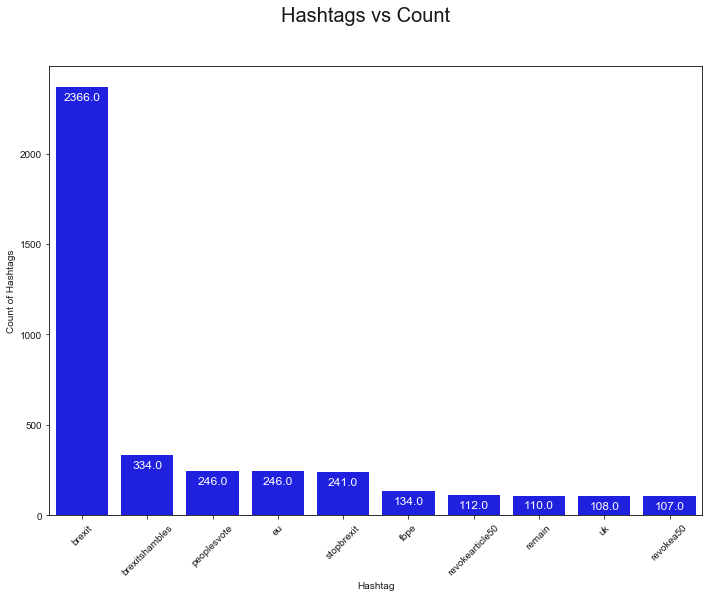

In [13]:
x = list(top_hashtags.keys())
y = list(top_hashtags.values())


sns.axes_style('white')

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

b=sns.barplot(x,y, color='blue', )
fig.suptitle('Hashtags vs Count', fontsize=20)
sns.set(font_scale = 1)
b.set(ylabel='Count of Hashtags', xlabel='Hashtag')
b.set_xticklabels(x, rotation=45)
for p in b.patches[0:]:
    b.annotate(np.round(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,-10),textcoords='offset points', color='white')

    
fig.savefig('Hashtags vs Count.jpg')

Timeseries plot for number of tweets per day

In [18]:
ts_date = df['tweet_date'].str[0:10]
ts_date = ts_date.tolist()

In [19]:
ts_date_dict = dict(Counter(ts_date))
ts_date_dict

{'2019-08-13': 1588,
 '2019-08-08': 1434,
 '2019-08-10': 1713,
 '2019-08-05': 1176,
 '2019-08-11': 2054,
 '2019-08-07': 1689,
 '2019-08-03': 1320,
 '2019-08-09': 1784,
 '2019-08-06': 1630,
 '2019-08-02': 243,
 '2019-08-04': 1062,
 '2019-08-14': 1781,
 '2019-08-12': 1862}

In [22]:
tsdata = pd.DataFrame({'date' : list(ts_date_dict.keys()), 'count_tweets' : list(ts_date_dict.values())})

In [23]:
tsdata = tsdata.sort_values('date')
tsdata = tsdata.set_index('date')


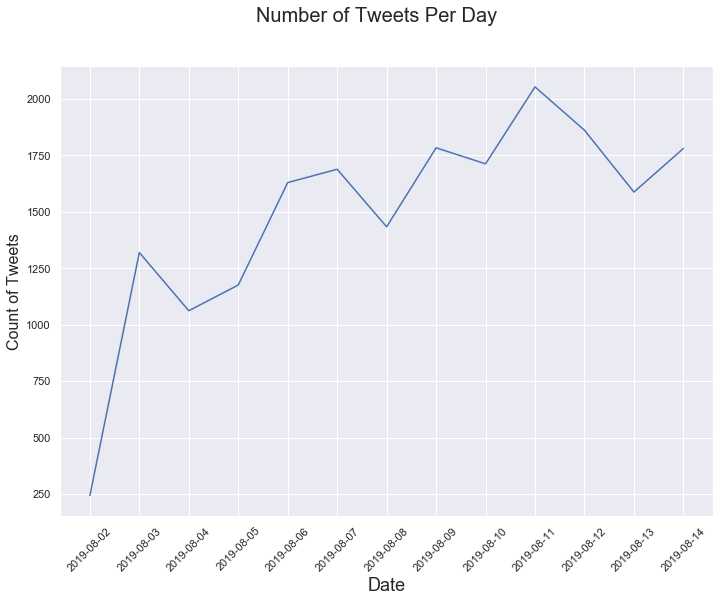

In [25]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xticklabels(tsdata.index, rotation=45)
fig.suptitle('Number of Tweets Per Day', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Count of Tweets', fontsize=16)
plt.plot(tsdata)
fig.savefig('Number of Tweets Per Day.jpg')

The distribution of top unigrams before removing stop words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
df.dropna(inplace=True)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus.apply(lambda x: np.str_(x)))
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['message'], 20)

df1 = pd.DataFrame(common_words, columns = ['message' , 'count'])

grouped_df = df1.groupby('message').sum()['count'].sort_values(ascending=False)

grouped_df = grouped_df.to_frame()
grouped_df.message = grouped_df
grouped_df.reset_index(level=0, inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


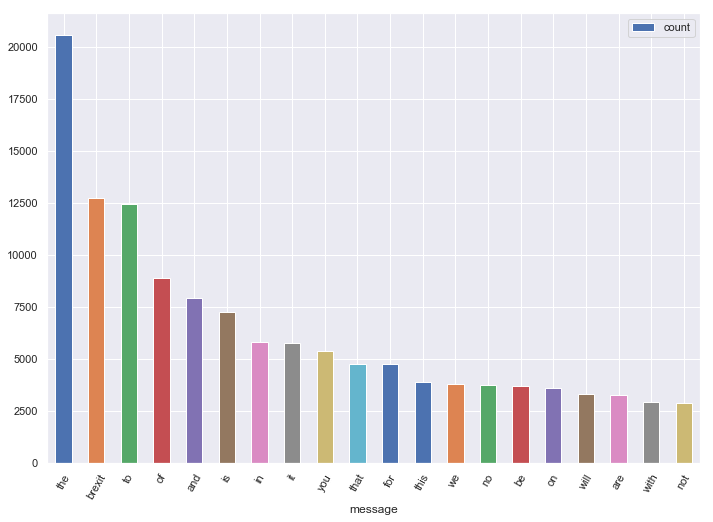

In [27]:
ax = grouped_df.plot.bar(x='message', y='count', rot=60, figsize=a4_dims)

The distribution of top bigrams after removing stop words

In [28]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['message'], 20)

df1 = pd.DataFrame(common_words, columns = ['message' , 'count'])

grouped_df = df1.groupby('message').sum()['count'].sort_values(ascending=False)

grouped_df = grouped_df.to_frame()
grouped_df.message = grouped_df
grouped_df.reset_index(level=0, inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


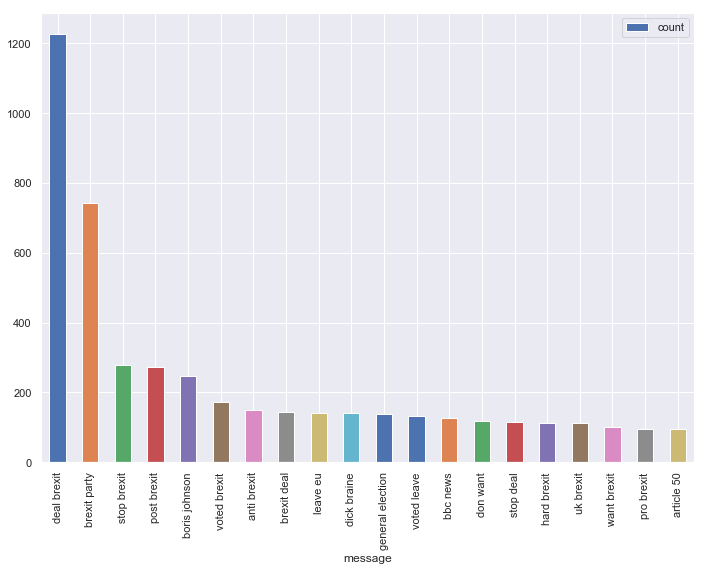

In [29]:
ax = grouped_df.plot.bar(x='message', y='count', rot=90, figsize=a4_dims)

The distribution of Top trigrams after removing stop words

In [30]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['message'], 20)


grouped_df = df1.groupby('message').sum()['count'].sort_values(ascending=False)

grouped_df = grouped_df.to_frame()
grouped_df.message = grouped_df
grouped_df.reset_index(level=0, inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


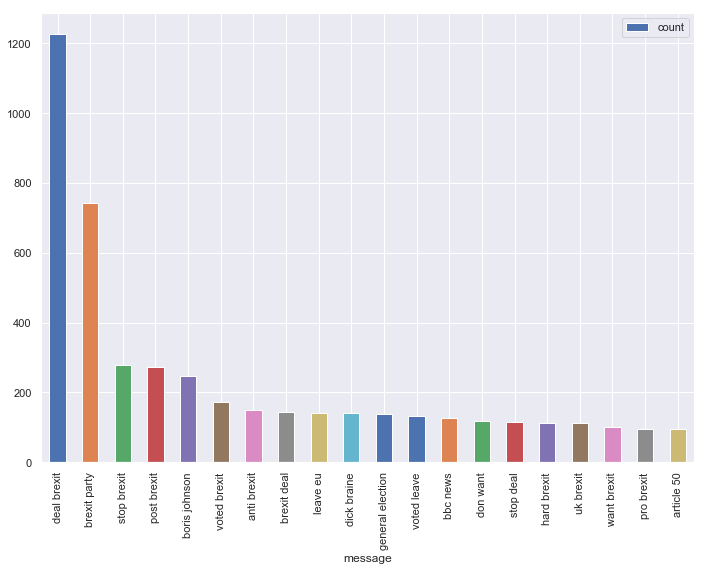

In [31]:
ax = grouped_df.plot.bar(x='message', y='count', rot=90, figsize=a4_dims)

The distribution of top part-of-speech tags of message corpus

In [32]:

!pip install textblob

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [35]:
from textblob import TextBlob

blob = TextBlob(str(df['message']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20].rename_axis('unique_values').to_frame('counts')
pos_df.pos_tag = pos_df.index

pos_df.reset_index(level=0, inplace=True)
pos_df.columns = ['pos_tag', 'count']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


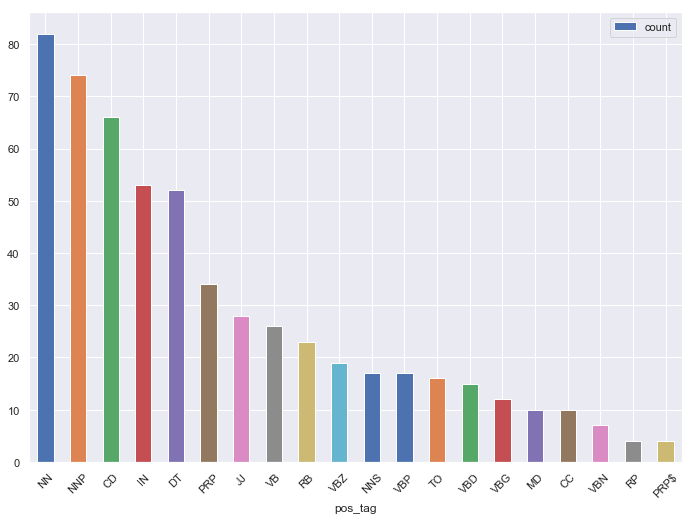

In [36]:
ax = pos_df.plot.bar(x='pos_tag', y='count', rot=45,figsize=a4_dims)

Word Cloud

In [37]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
lemma = WordNetLemmatizer()
my_stop=set(stopwords.words('english')+list(punctuation))

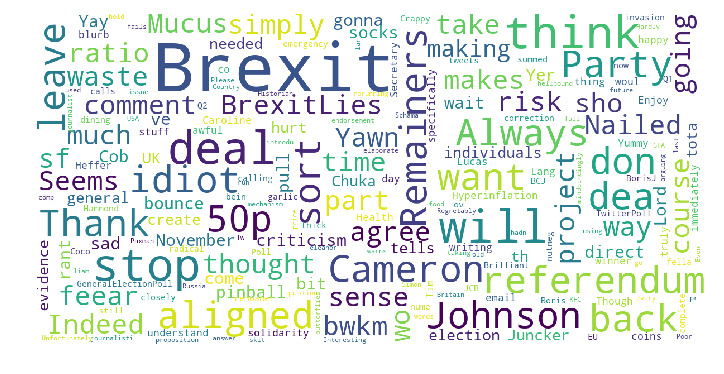

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

a4_dims = (11.7, 8.27)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.message)

Tweets per Place Count

In [40]:
place_count = df.place.value_counts()[:20].rename_axis('places').to_frame('counts')
place_count.places = place_count.index
place_count.reset_index(level=0, inplace=True)
place_count.columns = ['cities', 'count']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


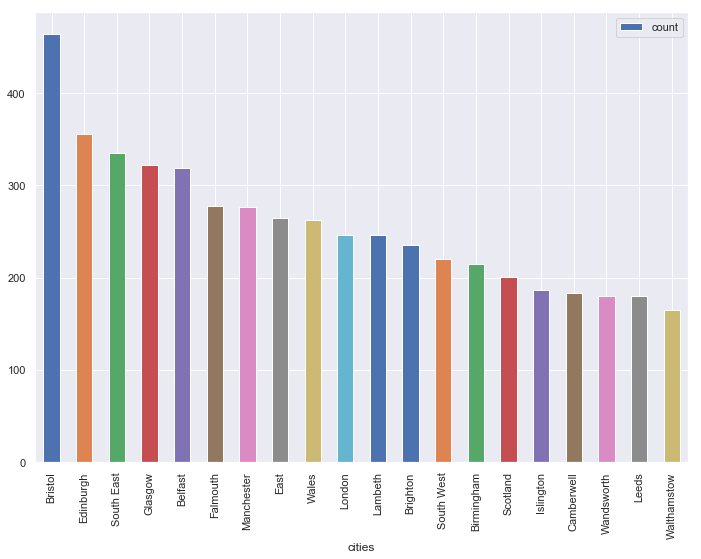

In [41]:
ax = place_count.plot.bar(x='cities', y='count', rot=90, figsize=a4_dims)

Bar Chart showing label count (without resampling using SMOTE)

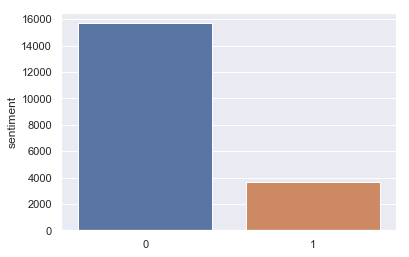

In [43]:
a4_dims = (11.7, 8.27)

sns.barplot(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts())

<h2>Preprocessing and Vectorization

In [44]:
def split_into_lemmas(message):
    message=message.lower()
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words :
        if word in my_stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tf = TfidfVectorizer(analyzer=split_into_lemmas,min_df=20,max_df=500,
                       stop_words=my_stop)

In [47]:
tf.fit(mydata['text'])

x = tf.transform(mydata['text'])

In [48]:
x = pd.DataFrame(x.toarray(), 
                   columns=tf.get_feature_names())

In [49]:
x.shape

(19336, 1873)

In [52]:
y = mydata['label'].astype('int')
y.value_counts()

0    15713
1     3623
Name: label, dtype: int64

Class imbalance. So adding more dummy rows using SMOTE.

Read here: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [58]:
!pip install imblearn

  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\hp\\anaconda3\\lib\\site-packages\\~klearn\\datasets\\_svmlight_format.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [61]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
x, y = sm.fit_sample(x, y)

ModuleNotFoundError: No module named 'imblearn'

In [43]:
y = pd.Series(y)
y.value_counts()

1    15713
0    15713
dtype: int64

In [0]:
x = pd.DataFrame(x)

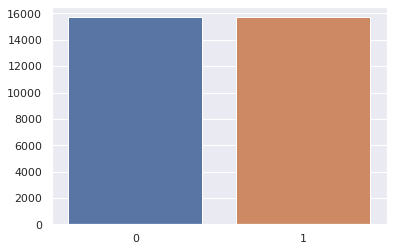

In [45]:
sns.barplot(x=y.value_counts().index, y=y.value_counts())

In [0]:
# df_corr = x
# df_corr["sentiment"] = y

# corr = df_corr.corr()
# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

<h2>Splitting Train and Test

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4,random_state=2)

In [0]:
# x_train.reset_index(drop=True,inplace=True)

<h2>Modelling with Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
clf_nb=MultinomialNB()

In [50]:
clf_nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

<h2>Evaluation Metrics

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [52]:
accuracy_score(y_test,clf_nb.predict(x_test))

0.7588895075968499

In [53]:
precision_recall_fscore_support(y_test, clf_nb.predict(x_test))

(array([0.7722213 , 0.74664225]),
 array([0.73684211, 0.78109532]),
 array([0.75411698, 0.7634803 ]),
 array([6308, 6263]))

In [54]:
print(classification_report(y_test, clf_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      6308
           1       0.75      0.78      0.76      6263

    accuracy                           0.76     12571
   macro avg       0.76      0.76      0.76     12571
weighted avg       0.76      0.76      0.76     12571



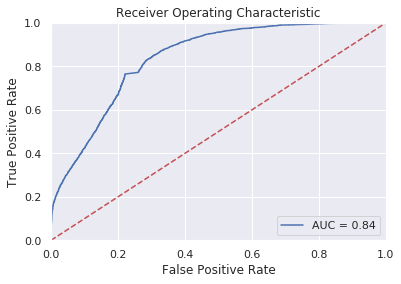

In [55]:
from  sklearn.metrics import roc_curve, auc

preds = clf_nb.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2>Modelling with Random Forest

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [57]:
# Number of trees in random forest
n_estimators = [50, 100, 60, 80, 90]
# Maximum number of levels in tree
max_depth = [10, 5, 8, 20, 15]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)


{'n_estimators': [50, 100, 60, 80, 90], 'max_depth': [10, 5, 8, 20, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [65]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([ 3.84368984,  6.16819485,  3.73874235,  3.78104782, 10.59570567,
        8.31686838,  9.55429626,  2.16711585, 10.87295246, 32.80108492]), 'std_fit_time': array([6.26219399e-02, 3.95560375e-02, 4.95442734e-03, 7.86759323e-03,
       3.17304333e-02, 5.65744483e-02, 6.34146838e-02, 7.94049099e-03,
       1.25075301e-01, 7.08625145e+00]), 'mean_score_time': array([0.1461153 , 0.20748361, 0.14987103, 0.14418252, 0.28904343,
       0.22998587, 0.27189167, 0.10283573, 0.30244112, 0.76935561]), 'std_score_time': array([0.01484403, 0.01521497, 0.00581326, 0.00479562, 0.00275984,
       0.00341997, 0.00543291, 0.00194932, 0.00240606, 0.27103093]), 'param_n_estimators': masked_array(data=[50, 100, 90, 60, 100, 60, 90, 50, 80, 60],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 10, 2, 5, 2, 2, 10, 2

In [0]:
y_predicted = random_search.predict(x_test)

In [61]:
accuracy_score(y_test,  y_predicted)

0.8488584838119482

In [62]:
precision_recall_fscore_support(y_test,  y_predicted)

(array([0.85514019, 0.8427337 ]),
 array([0.84131262, 0.85645857]),
 array([0.84817005, 0.8495407 ]),
 array([6308, 6263]))

In [63]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6308
           1       0.84      0.86      0.85      6263

    accuracy                           0.85     12571
   macro avg       0.85      0.85      0.85     12571
weighted avg       0.85      0.85      0.85     12571



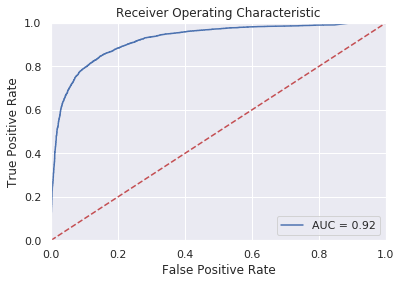

In [64]:
preds = random_search.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()